In [4]:
%matplotlib inline

In [5]:
red = '#D60606'
blue = '#0083DE'
green = '#00BA75'
yellow = '#FFC61E'
purple = '#A433B3'
orange = '#FD882E'
color_arr = [red, blue, green, yellow, purple, orange]

In [6]:
from gwpy.timeseries import TimeSeries
from gwpy.plot import Plot
import numpy as np
import matplotlib.pyplot as pl
import qnm_filter
from scipy.special import logsumexp
import random
import qnm
import matplotlib
mplparams = {
    'text.usetex': True,
    'axes.linewidth': 1,
    'lines.linewidth' : 1.5,
    'axes.grid': False,
    'axes.labelweight': 'normal',
    'font.family': 'DejaVu Sans',
    'font.size': 26,
    'figure.figsize': (10,8),
    'legend.fontsize': 26,
    'legend.handlelength' : 2,
    'axes.grid' : True,
    'axes.prop_cycle': matplotlib.cycler(color=color_arr) 
}
matplotlib.rcParams.update(mplparams)

1.6810694186076485
2.2019176709114445


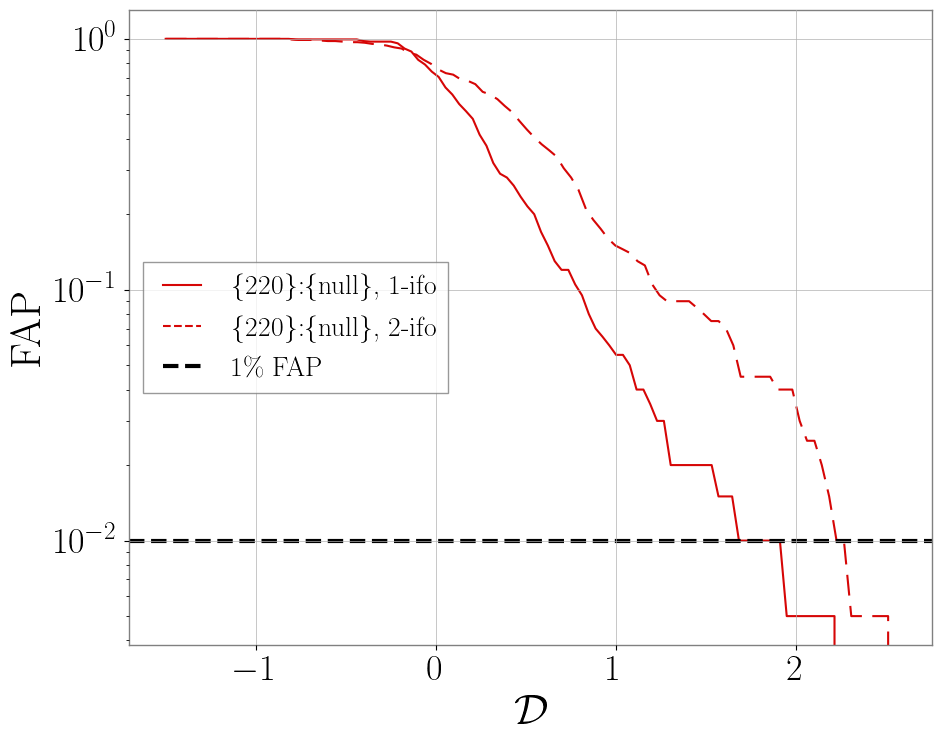

In [21]:
data = np.loadtxt("results/O4_design_overfiltered_220:None_ALL.dat")
[SNRtot_MF, evidence_inj, evidence_filt, nofilter] = data.T
log_BF = (evidence_filt - evidence_inj)/np.log(10)
BF_space = np.linspace(-1.5, max(log_BF), 100)
FAP = [np.count_nonzero(log_BF>i)/len(log_BF) for i in BF_space]
pl.semilogy(BF_space, FAP, label='\{220\}:\{null\}, 1-ifo', c=red)
print(np.quantile(log_BF, 0.99))
# pl.axvline(np.quantile(log_BF, 0.99), c='r', ls='--', label='99th percentile')
# pl.legend()

data = np.loadtxt("results/2detector_O4_design_overfiltered_220:None_ALL.dat")
[SNRtot_MF, evidence_inj, evidence_filt, nofilter] = data.T
log_BF = (evidence_filt - evidence_inj)/np.log(10)
print(np.quantile(log_BF, 0.99))
BF_space = np.linspace(-1.5, max(log_BF), 100)
FAP = [np.count_nonzero(log_BF>i)/len(log_BF) for i in BF_space]
pl.semilogy(BF_space, FAP, c=red, ls='--', dashes=[10, 5])
pl.semilogy(np.nan, np.nan, label='\{220\}:\{null\}, 2-ifo', c=red, ls='--')
pl.axhline(0.01, c='k', ls='--', linewidth = 3, label = "1\% FAP")

pl.xlabel("$\mathcal{D}$")
pl.ylabel("FAP")
leg = pl.legend(ncol=1, loc='center left', fontsize=20)
for line in leg.get_lines():
    line.set_linewidth(mplparams['lines.linewidth'])
leg.get_lines()[-1].set_linewidth(3)
# pl.ylim(10**(-2.5), 6e0)
# pl.title("0 mode injection case")
pl.tight_layout()
pl.savefig("plots/O4_design_0mode_injection_1+2_detectors.pdf")

2.7876839653599252
2.178695845365099


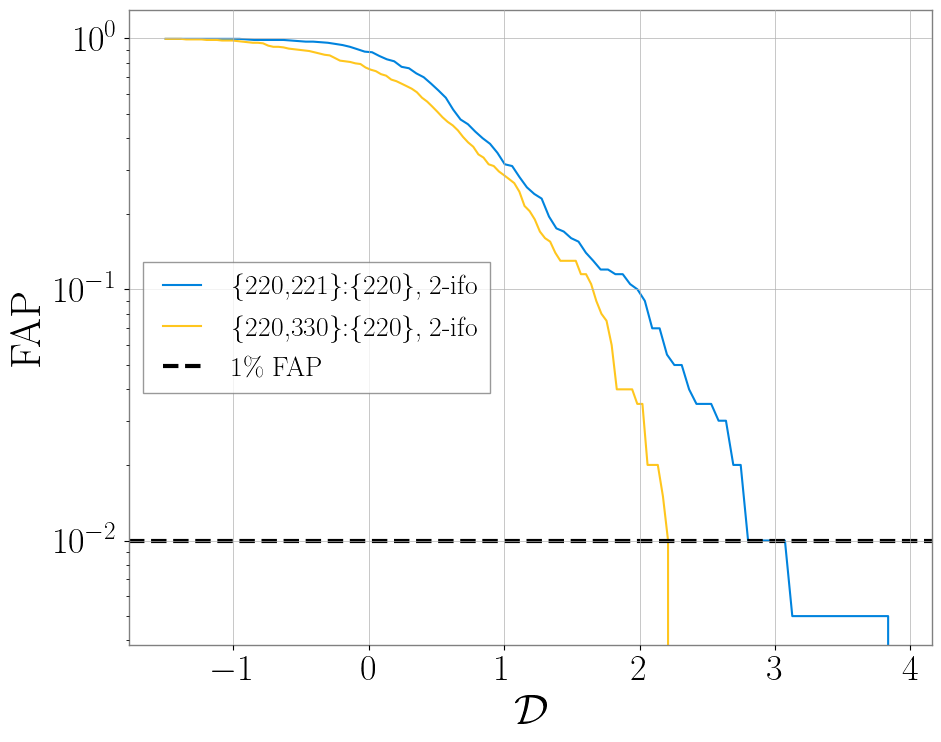

In [17]:
pl.grid(True)

data = np.loadtxt("results/2detector_O4_design_overfiltered_220+221:220_ALL.dat")
[SNRtot_MF, evidence_inj, evidence_filt, nofilter] = data.T
log_BF = (evidence_filt - evidence_inj)/np.log(10)
print(np.quantile(log_BF, 0.99))
BF_space = np.linspace(-1.5, max(log_BF), 100)
FAP = [np.count_nonzero(log_BF>i)/len(log_BF) for i in BF_space]
pl.semilogy(BF_space, FAP, c=blue)
pl.semilogy(np.nan, np.nan, label='\{220,221\}:\{220\}, 2-ifo', c=blue)
data = np.loadtxt("results/2detector_O4_design_overfiltered_220+330:220_ALL.dat")
[SNRtot_MF, evidence_inj, evidence_filt, nofilter] = data.T
log_BF = (evidence_filt - evidence_inj)/np.log(10)
print(np.quantile(log_BF, 0.99))
BF_space = np.linspace(-1.5, max(log_BF), 100)
FAP = [np.count_nonzero(log_BF>i)/len(log_BF) for i in BF_space]
pl.semilogy(BF_space, FAP, c=yellow)
pl.semilogy(np.nan, np.nan, label='\{220,330\}:\{220\}, 2-ifo', c=yellow)
pl.axhline(0.01, c='k', ls='--', linewidth = 3, label = "1\% FAP")

pl.xlabel("$\mathcal{D}$")
pl.ylabel("FAP")
leg = pl.legend(ncol=1, loc='center left', fontsize = 20)
for line in leg.get_lines():
    line.set_linewidth(mplparams['lines.linewidth'])
leg.get_lines()[-1].set_linewidth(3)

pl.tight_layout()
pl.savefig("plots/O4_design_1mode_injection_1+2_detectors.pdf")

2.1706958803478997
2.7876839653599252
1.9410104685616711
2.178695845365099


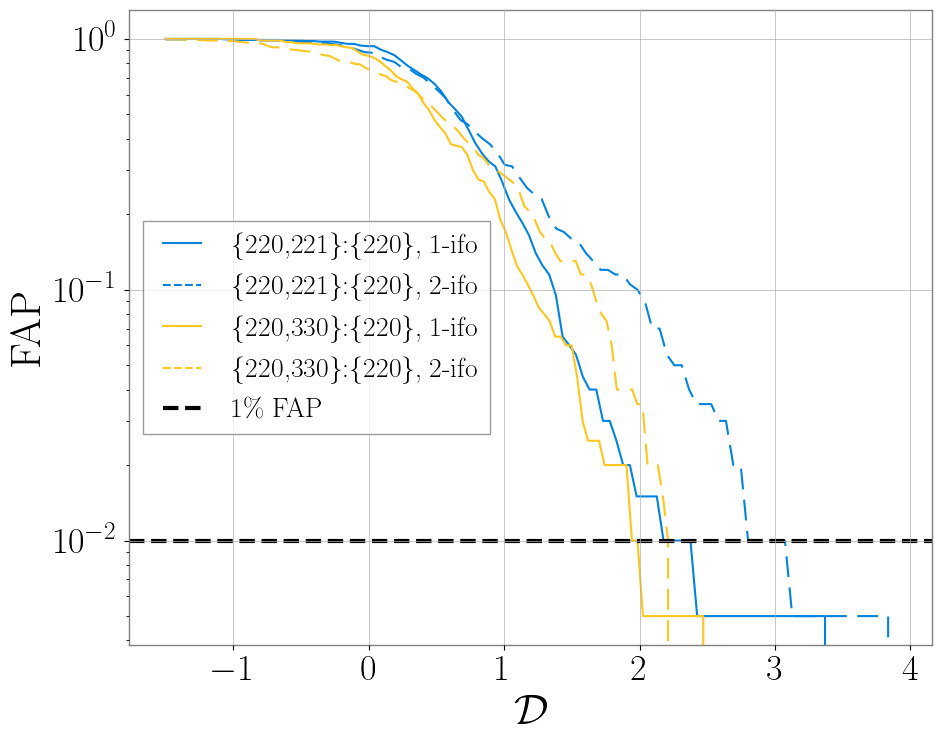

In [18]:
pl.grid(True)
data = np.loadtxt("results/O4_design_overfiltered_220+221:220_ALL.dat")
[SNRtot_MF, evidence_inj, evidence_filt, nofilter] = data.T
log_BF = (evidence_filt - evidence_inj)/np.log(10)
BF_space = np.linspace(-1.5, max(log_BF), 100)
FAP = [np.count_nonzero(log_BF>i)/len(log_BF) for i in BF_space]
pl.semilogy(BF_space, FAP, label='\{220,221\}:\{220\}, 1-ifo', c=blue)
print(np.quantile(log_BF, 0.99))
# pl.axvline(np.quantile(log_BF, 0.99), c='r', ls='--', label='99th percentile')
# pl.legend()

data = np.loadtxt("results/2detector_O4_design_overfiltered_220+221:220_ALL.dat")
[SNRtot_MF, evidence_inj, evidence_filt, nofilter] = data.T
log_BF = (evidence_filt - evidence_inj)/np.log(10)
print(np.quantile(log_BF, 0.99))
BF_space = np.linspace(-1.5, max(log_BF), 100)
FAP = [np.count_nonzero(log_BF>i)/len(log_BF) for i in BF_space]
pl.semilogy(BF_space, FAP, c=blue, ls='--', dashes=[10, 5])
pl.semilogy(np.nan, np.nan, label='\{220,221\}:\{220\}, 2-ifo', c=blue, ls='--')

data = np.loadtxt("results/1detector_O4_design_overfiltered_220+330:220_ALL.dat")
[SNRtot_MF, evidence_inj, evidence_filt, nofilter] = data.T
log_BF = (evidence_filt - evidence_inj)/np.log(10)
BF_space = np.linspace(-1.5, max(log_BF), 100)
FAP = [np.count_nonzero(log_BF>i)/len(log_BF) for i in BF_space]
pl.semilogy(BF_space, FAP, label='\{220,330\}:\{220\}, 1-ifo', c=yellow)
print(np.quantile(log_BF, 0.99))
# pl.axvline(np.quantile(log_BF, 0.99), c='r', ls='--', label='99th percentile')
# pl.legend()

data = np.loadtxt("results/2detector_O4_design_overfiltered_220+330:220_ALL.dat")
[SNRtot_MF, evidence_inj, evidence_filt, nofilter] = data.T
log_BF = (evidence_filt - evidence_inj)/np.log(10)
print(np.quantile(log_BF, 0.99))
BF_space = np.linspace(-1.5, max(log_BF), 100)
FAP = [np.count_nonzero(log_BF>i)/len(log_BF) for i in BF_space]
pl.semilogy(BF_space, FAP, c=yellow, ls='--', dashes=[10, 5])
pl.semilogy(np.nan, np.nan, label='\{220,330\}:\{220\}, 2-ifo', c=yellow, ls='--')
pl.axhline(0.01, c='k', ls='--', linewidth = 3, label = "1\% FAP")

pl.xlabel("$\mathcal{D}$")
pl.ylabel("FAP")
leg = pl.legend(ncol=1, loc='center left', fontsize = 20)
for line in leg.get_lines():
    line.set_linewidth(mplparams['lines.linewidth'])
leg.get_lines()[-1].set_linewidth(3)
pl.tight_layout()
pl.savefig("plots/O4_design_1mode_injection_1+2_detectors.pdf")

BF threshold = 2.788
BF threshold = 2.107


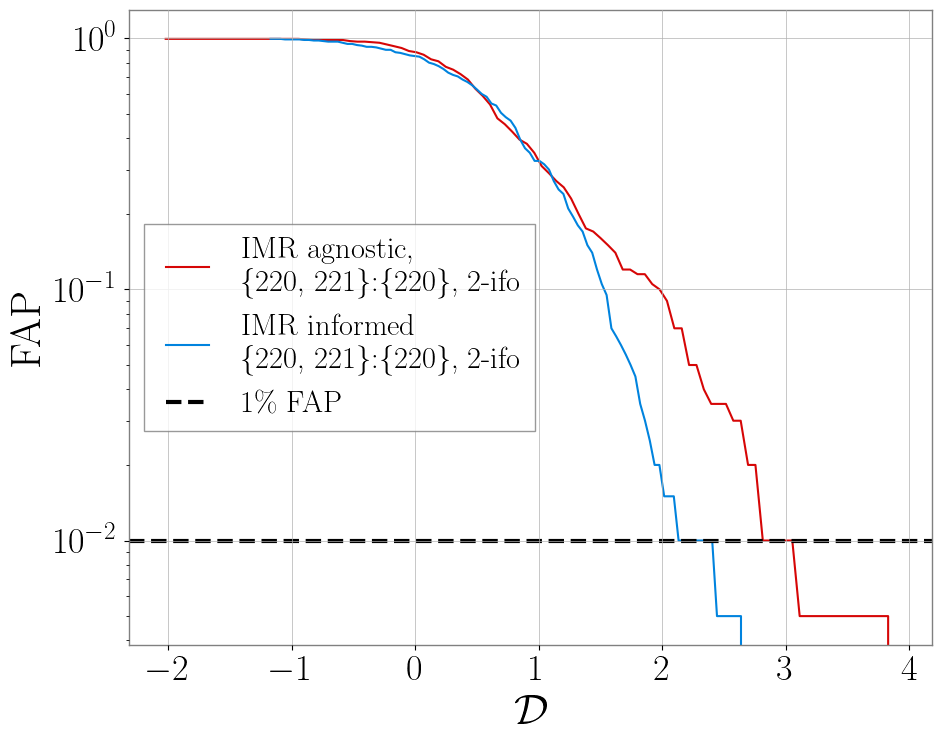

In [19]:
data = np.loadtxt("results/2detector_O4_design_overfiltered_220+221:220_ALL.dat")
[SNRtot_MF, evidence_inj, evidence_filt, nofilter] = data.T
log_BF = (evidence_filt - evidence_inj)/np.log(10)
print("BF threshold = %.3f" % np.quantile(log_BF, 0.99))
BF_space = np.linspace(min(log_BF), max(log_BF), 100)
FAP = [np.count_nonzero(log_BF>i)/len(log_BF) for i in BF_space]
pl.semilogy(BF_space, FAP, label='IMR agnostic, \n\{220, 221\}:\{220\}, 2-ifo', c=color_arr[0])

data = np.loadtxt("results/GW150914_posteriors_O4_design_220+221:220_ALL.dat")
[SNRtot_MF, evidence_inj, evidence_filt, nofilter] = data.T
log_BF = (evidence_filt - evidence_inj)/np.log(10)
print("BF threshold = %.3f" % np.quantile(log_BF, 0.99))
BF_space = np.linspace(min(log_BF), max(log_BF), 100)
FAP = [np.count_nonzero(log_BF>i)/len(log_BF) for i in BF_space]
pl.semilogy(BF_space, FAP, label='IMR informed \n\{220, 221\}:\{220\}, 2-ifo', c=color_arr[1])
pl.axhline(0.01, c='k', ls='--', linewidth = 3, label = "1\% FAP")

# pl.axvline(np.quantile(log_BF, 0.99), c='r', ls='--', label='99th percentile')
leg = pl.legend(loc='center left', fontsize=22)
for line in leg.get_lines():
    line.set_linewidth(mplparams['lines.linewidth'])
leg.get_lines()[-1].set_linewidth(3)

pl.xlabel("$\mathcal{D}$")
pl.ylabel("FAP")
# pl.title("1 mode injection case")
pl.tight_layout()
pl.savefig("plots/O4_design_1mode_injection_agnostic_conditional.pdf")